In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sensordata
sns.set_style(style='whitegrid')

datasets, features_sets, target_sets, metadata = sensordata.load_and_preprocess_data(validationset=True, savecsv=False, sensorset='FIS')
calibrationset = datasets[0]
calibration_features_matrix = features_sets[0]
calibration_co_cons = target_sets[0]

cal_experiment_matrix, cal_targets = sensordata.postprocess_data(calibration_features_matrix, calibration_co_cons)

In [10]:
def simpleplot(dep,
               indep,
               data = datasets[0],
               columns = metadata[0],
               units = metadata[1],
               figsize = (10,7),
               ylim = (0, 0),
               xlim = (0, 0),
               kind = 'plot'):
    """
    yeye- wowow
    """
    if xlim != (0, 0):
        x = data.iloc[xlim[0]:xlim[1],indep]
        y = data.iloc[xlim[0]:xlim[1],dep]
    elif ylim != (0,0):
        x = data.iloc[ylim[0]:ylim[1],indep]
        y = data.iloc[ylim[0]:ylim[1],dep]
    else:
        x = data.iloc[:,indep]
        y = data.iloc[:,dep]
    
    fig, ax = plt.subplots(figsize=figsize)
    if kind == 'scatter':
        ax.plot(x,y, marker='.', linestyle='none')
    else:
        ax.plot(x,y, marker='.', linestyle='-')
    
    ax.set_title(columns[dep] + ' against ' + columns[indep])
    ax.set_ylabel(columns[dep] + ' [' + units[dep] + ']', size=13)
    ax.set_xlabel(columns[indep] + ' [' + units[indep] + ']', size=13)
    return fig, ax

![Block diagram of the LOD estimation/validation method](images/lod-estimation.jpg "Figure 1")  
**Figure 1.** Experimental test bench for the generation of dynamic gas mixtures and acquisition of the sensor signals. Left: Block diagram. Right: Picture. [1]

![Block diagram of the LOD estimation/validation method](images/sensor.png "Figure 2")  
**Figure 2.** Sensor response illustration. [2]

## Data Set Information:

A chemical detection platform composed of **14 temperature-modulated metal oxide semiconductor (MOX) gas sensors** was exposed to dynamic mixtures of carbon monoxide (**CO**) and humid synthetic air in a gas chamber.

The acquired **time series of the sensors** and the measured values of **CO concentration**, **humidity** and **temperature** inside the gas chamber are provided.

#### Attribute Information:

The dataset is presented in 13 text files, where each file corresponds to a different measurement day.  
Each file includes the acquired time series, presented in 20 columns:  

| Time (s)  | CO concentration (ppm)    | Humidity (%r.h.)  | Temperature (C) | Flow rate (mL/min) |  Heater voltage (V) |
| --------- |:-------------------------:|:-----------------:|:---------------:|:------------------:|:-------------------:|

and the measured resistance of the 14 MOX gas sensors: 

| R01 (MOhm) | R02 (MOhm) | R03 (MOhm) | R04 (MOhm) | R05 (MOhm) | R06 (MOhm) |  R07 (MOhm) |
| ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |  ---------- |


| R08 (MOhm) | R09 (MOhm) | R10 (MOhm) | R11 (MOhm) | R12 (MOhm) | R13 (MOhm) | R14 (MOhm) |
| ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |

Resistance values **R01-R07** correspond to **FIGARO TGS 3870 A-04** sensors, whereas **R08-R14** correspond to **FIS SB-500-12** units.  
The time series are sampled at approximately **3.5 Hz**.  

**Important limitations to note:**
-  MOX sensors lacks selectivity
-  MOX sensors lacks stability
-  MOX sensors have slow recovery time
-  MOX sensors have large tolerances in specifications for identical devices

**Transduction**  
The transduction mechanism of MOX sensors consists on  
measuring resistance changes resulting from chemical interactions  
between the gas species and the metal oxide surface.

**Selectivity**  
Selectivity to a given analyte can be increased by  
modulating the operating temperature with a periodic heating  
power waveform [4]. The resulting multivariate response patterns  
capture the selectivity-temperature dependence characteristic of  
the target gas plus the effect of the interferences. The variables of  
the response pattern are highly correlated because the shape of the  
heating waveform smoothly varies the sensor temperature (except  
for the temperature transitions).

### Exposure due to human inhaling

| Level of CO | Health Effects, and Other Information |
| -----------:|:------------------------------------- |
| 0 PPM | Normal, fresh air. |
| 9 PPM | Maximum recommended indoor CO level (ASHRAE). |
| 10-24 PPM | Possible health effects with long-term exposure. |
| 25 PPM | Max TWA Exposure for 8 hour work-day (ACGIH). Pocket CO TWA warning sounds each hour. |
| 50 PPM | Maximum permissible exposure in workplace (OSHA).First Pocket CO ALARM starts (optional, every 20 seconds). |
| 100 PPM | Slight headache after 1-2 hours. |
| 125 PPM | Second Pocket CO ALARM starts (every 10 seconds). |
| 200 PPM | Dizziness, naseau, fagitue, headache after 2-3 hours of exposure. |
| 400 PPM | Headache and nausea after 1-2 hours of exposure. Life threatening in 3 hours. Third Pocket CO ALARM starts (every 5 seconds). |
| 800 PPM | Headache, nausea, and dizziness after 45 minutes; collapse and unconsciousness after 1 hour of exposure. Death within 2-3 hours. |
| 1000 PPM | Loss of consciousness after 1 hour of exposure. |
| 1600 PPM | Headache, nausea, and dizziness after 20 minutes of exposure. Death within 1-2 hours. |
| 3200 PPM | Headache, nausea, and dizziness after 5-10 minutes; collapse and unconsciousness after 30 minutes of exposure. Death within 1 hour. |
| 6400 PPM | Death within 30 minutes. |
| 12,800 PPM | Immediate physiological effects, unconsciousness. Death within 1-3 minutes of exposure. |


### Analytics approaches suggestion
  1. Threshhold classifier (warning system)
  2. Concentration predictor (advanced logging system)
  3. Concentration classifier (simple logging system)
  4. Substance identifier (monitoring system)

#### Reverences:

The description of the experimental setup and chemical detection platform can be found in [1-2].  
The dataset has been used also in [3].

1. J. Burgués, J.M Jiménez-Soto, S. Marco, *Estimation of the limit of detection in semiconductor gas sensors through linearized calibration models*, Analytica chimica acta 1013 (2018): 13-25.
2. J. Burgués, S. Marco, *Multivariate estimation of the limit of detection by orthogonal partial least squares in temperature-modulated MOX sensors*, Analytica chimica acta 1019 (2018): 49-64.
3. L. Fernandez, J. Yan, J. Fonollosa, J. Burgués, A. Gutierrez, S. Marco, *A practical method to estimate the resolving power of a chemical sensor array: application to feature selection*, Frontiers in chemistry 6 (2018).
30. A.P. Lee, B.J. *Reedy, Temperature modulation in semiconductor gas sensing*, Sensors Actuators B Chem. 60 (1999) 35e42.

In [2]:
calibrationset.head()

,Time,CO,Humidity,Temperature,FlowRate,HeaterVoltage,R01,R02,R03,R04,...,R06,R07,R08,R09,R10,R11,R12,R13,R14,HeatingCycle
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,...,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,5.000
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,...,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,5.309
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,...,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,5.618
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,...,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,5.926
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,...,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,6.234


# Experimental measurments

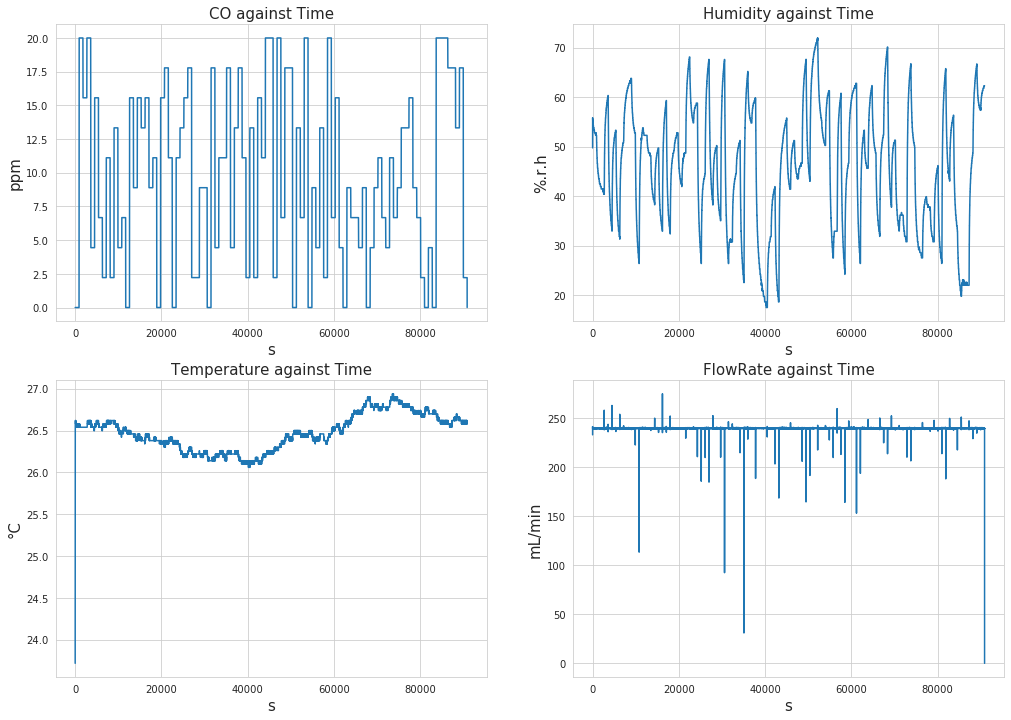

In [4]:
dataset = calibrationset
x = dataset.iloc[:,0]

rows,cols = (2,2)
fig, axes = plt.subplots(rows,cols,figsize=(17,12))
n = 0
for i in range(rows):
    for j in range(cols):
        n+=1
        if n < len(dataset.columns):
            axes[i,j].plot(x, dataset.iloc[:,n])
            axes[i,j].set_title(dataset.columns[n] + ' against ' + dataset.columns[0], size=15)
            axes[i,j].set_xlabel(metadata[1][0], size=15)
            axes[i,j].set_ylabel(metadata[1][n], size=15)
plt.show()

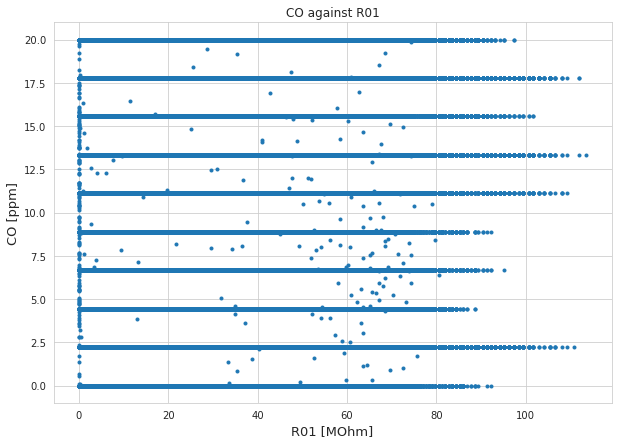

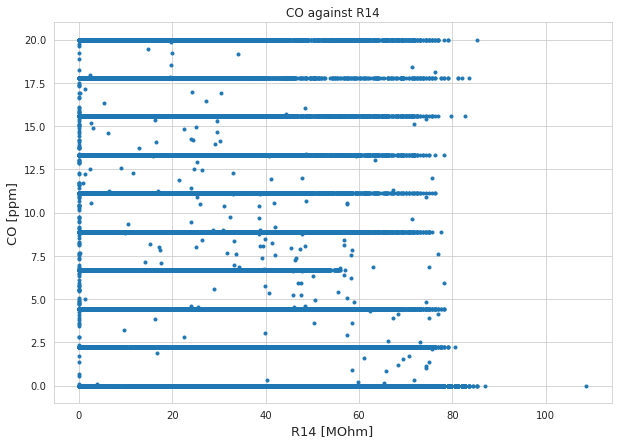

In [15]:
dep = metadata[2]["CO"]; indep = metadata[2]["R01"]
simpleplot(dep,indep, kind='scatter')
plt.show()

dep = metadata[2]["CO"]; indep = metadata[2]["R14"]
simpleplot(dep,indep, kind='scatter')
plt.show()

### Signal response due to cyclic pattern
Capturing periodic intervals of the measurments, that is capturing signal responses.

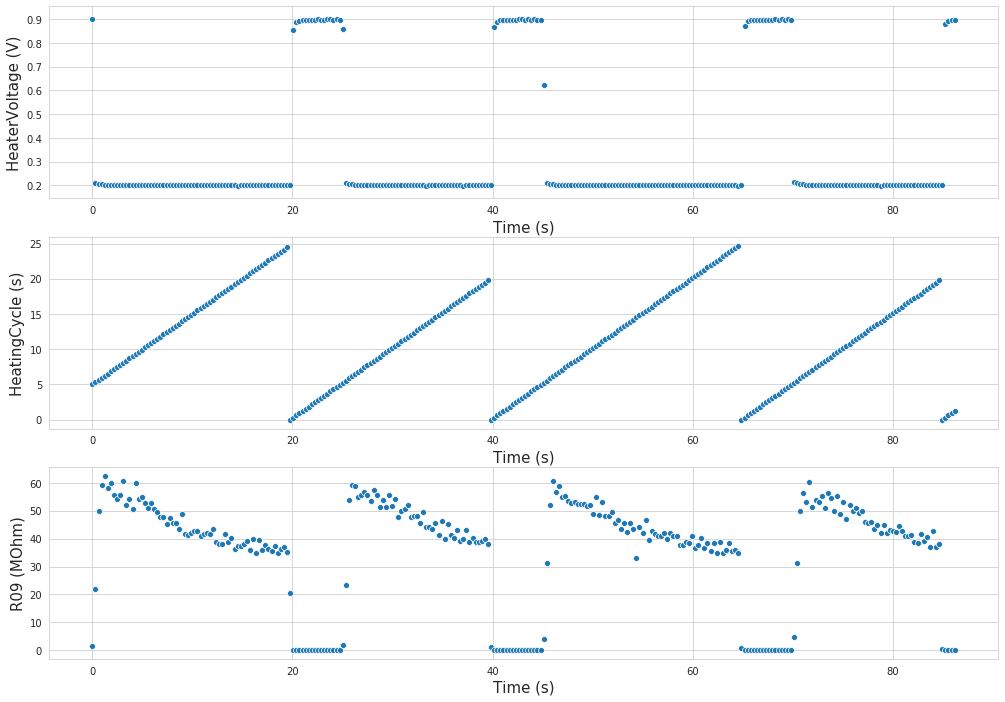

In [54]:
fig, axes = plt.subplots(3,1, figsize=(17,12))
start = 0
stop = start + 280
sensorcol = metadata[2]["R09"]
dataset = calibrationset
#dataset = dataset[1]
x=dataset["Time"][start:stop]

sns.scatterplot(x=x, y=dataset["HeaterVoltage"], ax=axes[0])
sns.scatterplot(x=x, y=dataset["HeatingCycle"], ax=axes[1])
sns.scatterplot(x=x, y=dataset["R08"], ax=axes[2])
axes[0].set_ylabel(metadata[0][5] + " (" + metadata[1][5] + ")", size=15)
axes[1].set_ylabel(metadata[0][20] + " (" + metadata[1][20] + ")", size=15)
axes[2].set_ylabel(metadata[0][sensorcol] + " (" + metadata[1][sensorcol] + ")", size=15)
axes[0].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
axes[1].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
axes[2].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
plt.show()

# Sensor plots
Sensor response varying with heating cycle period in a non-linear way

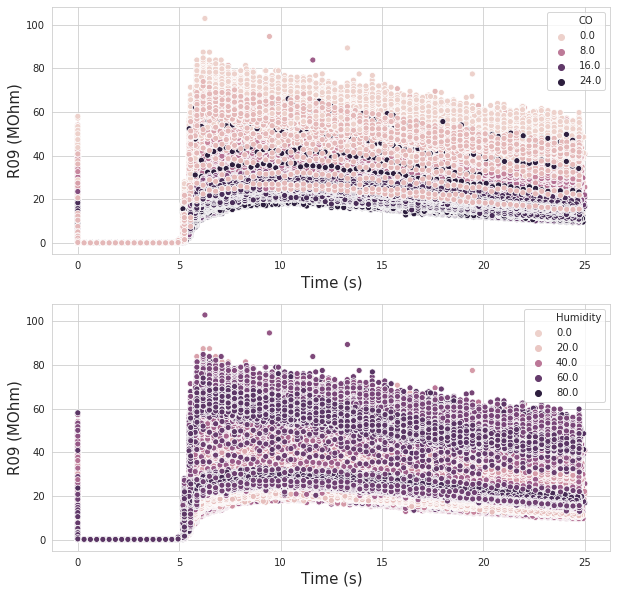

In [55]:
sensor = "R08"
dataset = calibrationset
#dataset = dataset[dataset["HeaterVoltage"] < 0.25]
y = dataset[sensor]
x = dataset["HeatingCycle"]

fig, axes = plt.subplots(2,1, figsize=(10,10))

sns.scatterplot(data=dataset,y=y,x=x,
                hue="CO",
                ax=axes[0])

sns.scatterplot(data=dataset, y=y, x=x,
                hue="Humidity",
                ax=axes[1])

axes[0].set_ylabel(metadata[0][14] + " (" + metadata[1][14] + ")", size=15)
axes[1].set_ylabel(metadata[0][14] + " (" + metadata[1][14] + ")", size=15)
axes[0].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
axes[1].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
plt.show()

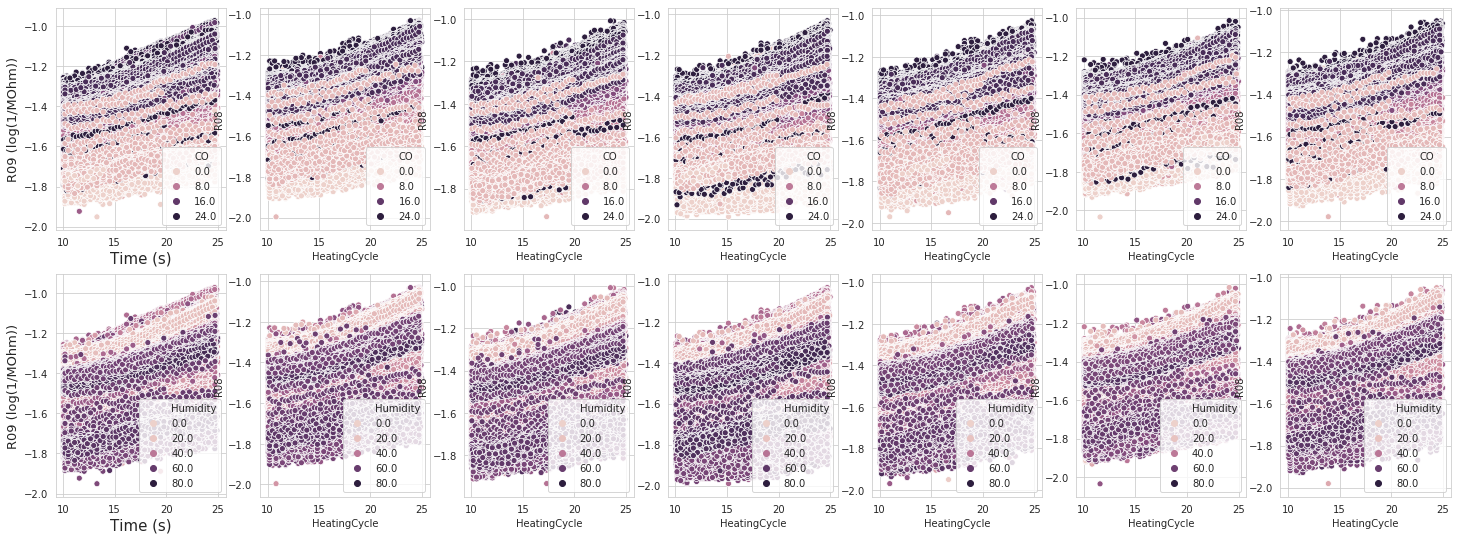

In [56]:
def plotparams(dataset):
    sensor = "R08"; delay = 10
    datafilter = (dataset["HeatingCycle"] > delay)
    x = dataset["HeatingCycle"][datafilter]
    y = np.log10(1/dataset[sensor][datafilter])
    return x, y

def simplescatter(dataset,hue,ax):
    x, y = plotparams(dataset)
    plot = sns.scatterplot(data=dataset,
                            y=y,
                            x=x,
                            hue=hue,
                            ax=ax)
    return plot

days = 7
fig, axes = plt.subplots(2,days, figsize=(25,9))
for col in range(days):
    dataset = datasets[col]
    simplescatter(dataset,'CO',axes[0,col])
    simplescatter(dataset,'Humidity',axes[1,col])
    axes[0,col].legend(loc='lower right')
    axes[1,col].legend(loc='lower right')

axes[0,0].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
axes[0,0].set_ylabel(metadata[0][14] + " (log(1/MOhm))", size=13)
axes[1,0].set_xlabel(metadata[0][0] + " (" + metadata[1][0] + ")", size=15)
axes[1,0].set_ylabel(metadata[0][14] + " (log(1/MOhm))", size=13)

plt.show()

# Pre- and postprocessing of data

  * Collect signals from sensors and use signal data as features.
  * Use experimental setup and collect sample data, which is sampled in 15 minutes periods for each target concentration  
    (6.66 minutes for FIG-sensors and 8.33 for FIS-sensors)

In [35]:
print(54*7)
print(calibration_features_matrix.shape)
pd.DataFrame(calibration_features_matrix).head()

378
(2020, 378)


,0,1,2,3,4,5,6,7,8,9,...,368,369,370,371,372,373,374,375,376,377
0,-3.907000,-4.055758,-3.982062,-4.041668,-3.867559,-4.142239,-4.082312,-4.190915,-4.202225,-4.204237,...,-3.850365,-3.850365,-3.850365,-3.850365,-3.850365,-3.850365,-3.850365,-3.850365,-3.850365,-3.850365
1,-3.950767,-4.063022,-4.085674,-4.108956,-3.834671,-4.105723,-4.105280,-4.206154,-4.100643,-4.174178,...,-3.861443,-3.861443,-3.861443,-3.861443,-3.861443,-3.861443,-3.861443,-3.861443,-3.861443,-3.861443
2,-3.689037,-3.783487,-3.811895,-3.856637,-3.652366,-3.925111,-3.997694,-4.082648,-3.994460,-4.060795,...,-3.736641,-3.568177,-3.420833,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662
3,-3.800951,-3.991435,-3.988806,-4.028719,-3.834671,-4.077910,-3.970962,-4.206154,-4.066048,-4.189099,...,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662,-3.823662
4,-4.120418,-4.125635,-4.052767,-4.159472,-3.936624,-4.178719,-4.082312,-4.190915,-4.224650,-4.211192,...,-3.845368,-3.845368,-3.845368,-3.845368,-3.845368,-3.845368,-3.845368,-3.845368,-3.845368,-3.845368


In [51]:
print(20*20/60)
print(20*25/60)
print(378*20)
print(cal_experiment_matrix.shape)
pd.DataFrame(cal_experiment_matrix).head()

6.666666666666667
8.333333333333334
7560
(100, 7560)


,0,1,2,3,4,5,6,7,8,9,...,7550,7551,7552,7553,7554,7555,7556,7557,7558,7559
0,-3.963788,-4.111531,-4.193939,-4.195952,-3.948594,-4.202369,-4.135782,-3.896154,-4.256305,-4.242368,...,-2.520370,-2.095364,-1.764868,-2.174536,-2.174536,-2.174536,-2.174536,-2.174536,-2.174536,-2.174536
1,-2.081352,-1.962079,-2.070905,-2.227603,-2.133776,-2.303165,-2.424050,-2.272724,-2.339033,-2.449081,...,-2.576178,-2.576178,-2.576178,-2.576178,-2.576178,-2.576178,-2.576178,-2.576178,-2.576178,-2.576178
2,-2.530254,-2.451746,-2.485556,-2.626464,-2.528916,-2.698848,-2.824060,-2.730196,-2.717875,-2.831936,...,-2.649305,-2.259563,-1.952843,-2.327824,-2.372969,-2.141136,-2.631500,-2.244172,-1.941716,-2.323808
3,-2.040064,-1.995326,-2.076387,-2.244172,-2.168494,-2.338946,-2.499393,-2.427684,-2.420199,-2.541815,...,-3.608423,-3.396121,-3.287700,-3.559260,-3.330396,-3.438236,-3.486396,-3.385921,-3.284195,-3.559260
4,-3.492676,-3.538571,-3.569938,-3.654454,-3.582210,-3.761126,-3.806056,-3.913893,-3.801480,-3.873625,...,-2.924021,-2.610606,-2.341007,-2.652171,-2.651416,-2.493354,-2.896900,-2.602134,-2.325667,-2.635716


(100,)


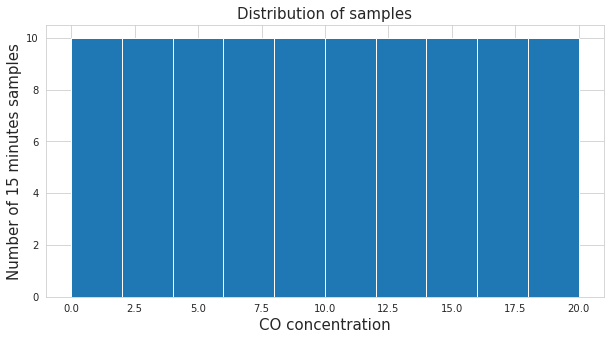

In [38]:
print(cal_targets.shape)
plt.figure(figsize=(10,5))
plt.title("Distribution of samples", fontsize=15)
plt.ylabel("Number of 15 minutes samples", fontsize=15)
plt.xlabel("CO concentration", fontsize=15)
plt.hist(cal_targets)
plt.show()

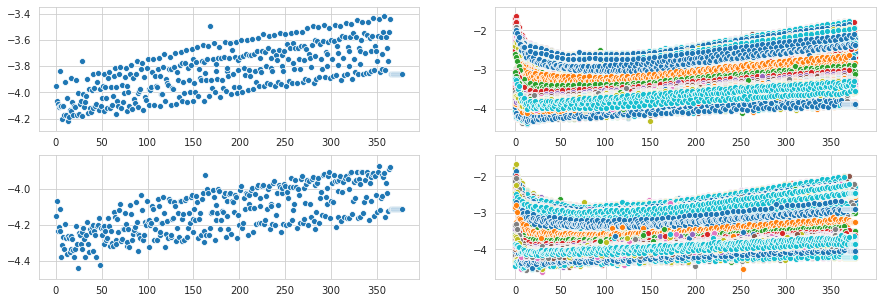

In [3]:
day = 1
fig, axes = plt.subplots(2,2, figsize=(15,5))
signalsample = 1
signalconc = target_sets[day-1][signalsample]
signal = features_sets[day-1][signalsample,:]
nsig = len(signal)
sns.scatterplot(np.arange(nsig),signal, ax=axes[0,0])

signalconcs = target_sets[day-1]
signals = features_sets[day-1]
nsig = len(signals)
for signal in signals[:100]:
    nsig = len(signal)
    sns.scatterplot(np.arange(nsig),signal, ax=axes[0,1])

day = 13
signalsample = 1
signalconc = target_sets[day-1][signalsample]
signal = features_sets[day-1][signalsample,:]
nsig = len(signal)
sns.scatterplot(np.arange(nsig),signal, ax=axes[1,0])

signalconcs = target_sets[day-1]
signals = features_sets[day-1]
nsig = len(signals)
for signal in signals[:100]:
    nsig = len(signal)
    sns.scatterplot(np.arange(nsig),signal, ax=axes[1,1])
plt.show()